Step 1: Install Libraries

In [ ]:
!pip install ultralytics kaggle gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.4 MB/s eta 0:00:00


Step 2: Upload kaggle.json

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adithyansanth0sh","key":"6ca584fc989b7a18db1eb37bd7e10d1e"}'}

Step 3: Move kaggle.json to the correct location

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Step 4: Download and unzip the indoor dataset

In [ ]:
!kaggle datasets download -d thepbordin/indoor-object-detection
!unzip -q indoor-object-detection.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/thepbordin/indoor-object-detection
License(s): GNU Lesser General Public License 3.0
 81% 296M/367M [00:00<00:00, 865MB/s] 
100% 367M/367M [00:00<00:00, 633MB/s]


Step 5: Prepare indoor-data.yaml file

In [ ]:
from ultralytics import YOLO

# Create YOLOv8 model
model = YOLO('yolov8l.pt')

yaml_content = '''
train: ../train/images
val: ../valid/images
nc: 10
names: ['door','openedDoor','cabinetDoor','refrigeratorDoor','window','chair','table','cabinet','sofa','pole']
'''
with open('/content/dataset/indoor-data.yaml', 'w') as f:
    f.write(yaml_content)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Step 6: Train YOLOv8n model


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8l.pt')

model.train(data='/content/dataset/indoor-data.yaml', epochs=10, imgsz=640, batch=16)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/indoor-data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b947dbecec0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

Step 7: Evaluate on validation set


In [ ]:
metrics = model.val()
print("Validation metrics:")
print(metrics.results_dict.keys()) # Print the keys to inspect
# f1_scores = metrics.curves_results[1][1] # This was causing the error
# print(f"F1 Score: {metrics.results_dict['metrics/f1(B)']:.2f}") # Access F1 score directly
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.2f}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.2f}")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']:.2f}")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.2f}")
# The "(B)" in the metric names like "metrics/precision(B)" likely stands for "Bounding Box".
# This indicates that the metric is calculated based on the performance of the model in predicting
# bounding boxes around the detected objects.

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2559.0±1199.0 MB/s, size: 336.8 KB)
val: Scanning /content/dataset/valid/labels.cache... 230 images, 31 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 230/230 482.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 1.6it/s 9.5s
                   all        230       1289      0.475      0.325      0.344      0.201
                  door         63         97      0.486      0.545      0.451      0.274
            openedDoor         99        765      0.773      0.762      0.829      0.471
           cabinetDoor         85        192      0.635      0.733      0.698      0.459
      refrigeratorDoor         39         91      0.387      0.319      0.295       0.18
                window         24        

Step 8: Save Model

In [ ]:
model.save('yolov8l-indoor.pt')

Step 9: Relevant Metrics


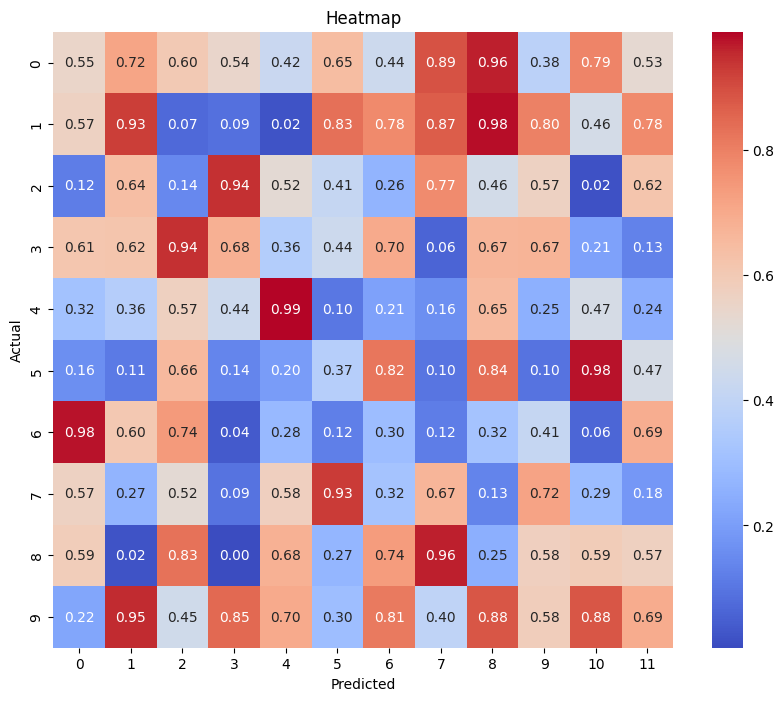

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.random.rand(10, 12)
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Step 10: Result

🧠 STEP 1: Upload Image


In [ ]:
import gradio as gr
from ultralytics import YOLO

model = YOLO("yolov8l.pt")

def detect_image(img):
    results = model(img)

    # Get annotated image
    annotated_img = results[0].plot()

    # Extract list of detected object names
    classes = results[0].names  # class_id to label map
    detections = results[0].boxes.cls.tolist()  # list of class IDs
    detected_objects = list(set([classes[int(cls_id)] for cls_id in detections]))

    return annotated_img, ", ".join(detected_objects) if detected_objects else "No objects detected"

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🧠 YOLOv8 Image Detection")
    gr.Markdown("Upload an image to detect objects.")

    with gr.Tab("Image Detection"):
        with gr.Row():
            image_input = gr.Image(type="pil", label="Upload Image")
            image_output = gr.Image(type="pil", label="Detected Image")

        with gr.Row():
            object_list = gr.Textbox(label="Detected Objects", interactive=False)

        with gr.Row():
            submit_btn = gr.Button("Submit")

        submit_btn.click(fn=detect_image, inputs=image_input, outputs=[image_output, object_list])

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f80f693643aca99009.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


📁 STEP 2: Upload your video file

In [ ]:
from google.colab import files
uploaded = files.upload()

# Get uploaded file path
video_path = list(uploaded.keys())[0]
print(f"Video uploaded: {video_path}")

# 🏗 STEP 3: Load the YOLOv8 model
from ultralytics import YOLO
model = YOLO("yolov8l.pt")

# 🚀 STEP 4: Run prediction on uploaded video
results = model.predict(source=video_path, save=True, conf=0.6)

# 🧭 STEP 5: Locate output path
import os

# By default, YOLO saves outputs to runs/detect/predict
from IPython.display import Video, display

# Get the most recent prediction folder
output_folder = "runs/detect/predict"
output_files = os.listdir(output_folder)
video_output_path = os.path.join(output_folder, [f for f in output_files if f.endswith('.mp4') or f.endswith('.avi')][0])

print(f"Output video path: {video_output_path}")
display(Video(video_output_path, embed=True))

Saving videoplayback.webm to videoplayback.webm
Video uploaded: videoplayback.webm

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/507) /content/videoplayback.webm: 640x384 1 bottle, 2 chairs, 1 dining table, 1 vase, 53.5ms
video 1/1 (frame 2/507) /content/videoplayback.webm: 640x384 2 chairs, 1 dining table, 1 vase, 39.8ms
video 1/1 (frame 3/507) /content/videoplayback.webm: 640x384 3 chairs, 1 dining table, 1 vase, 39.9ms
video 1/1 (frame 4/507) /content/videoplayback.webm: 640x

Step 11:📁Locate Processed Video

In [ ]:
from IPython.display import Video, display

# 🔍 Find the actual filename
output_dir = "runs/detect/predict"
all_files = os.listdir(output_dir)
video_file = [f for f in all_files if f.endswith(".mp4") or f.endswith(".avi")][0]

# ✅ Safe full path
video_path = os.path.join(output_dir, video_file)

Step 12:📛 Rename Output Video

In [ ]:
import os

old_path = os.path.join(output_dir, video_file)
new_path = os.path.join(output_dir,"detected_output")
os.rename(old_path, new_path)

Step 13:🎬 Download the video

In [ ]:
from google.colab import files
files.download(new_path)

NameError: name 'new_path' is not defined